In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8, 6)
import numpy as np
from root_pandas import *
data = read_root('store/tmp/SIM_Bd_D0mumu_ALL.Reduce.ResamplePID.ApplyTrigger.Select.KFoldCrossValidation.root')

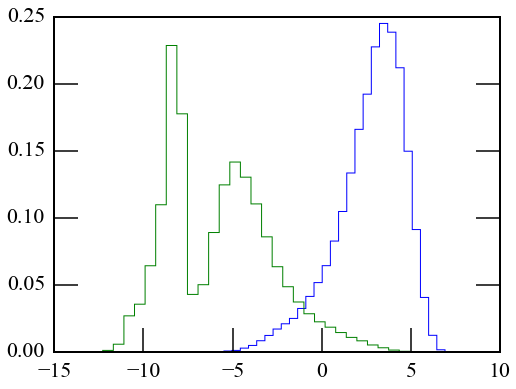

In [17]:
data.query('(signal == 1)')['decision'].hist(bins=30, histtype='step', normed=True, grid=False)
data.query('(signal == 0)')['decision'].hist(bins=30, histtype='step', normed=True, grid=False)

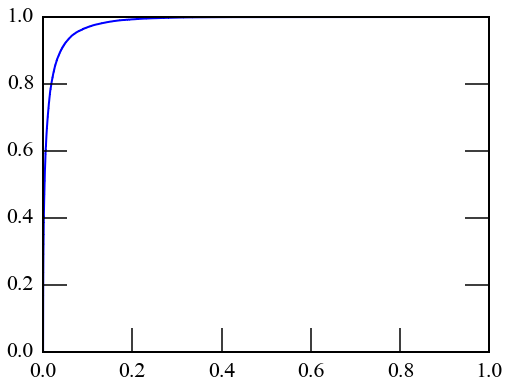

In [18]:
from sklearn.metrics import roc_curve
fpr, tpr, thres = roc_curve(data['signal'], data['decision'])
plt.plot(fpr, tpr, lw=2)

In [19]:
bkg_eff = fpr
sig_eff = tpr
fom = tpr / (1000 * np.sqrt(fpr) + 3/2)

5.52294150472


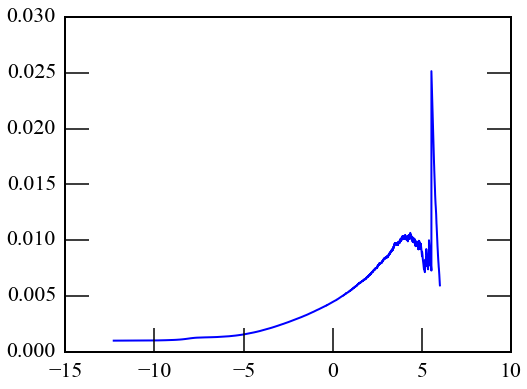

In [20]:
plt.plot(thres[thres < 6], fom[thres < 6])
print(thres[np.argmax(fom)])